In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/train.csv')
df['id'] = pd.to_datetime(df['id'])

In [3]:
df.head()

id  valeur_NO2  valeur_CO  valeur_O3  valeur_PM10  \
0 2020-01-01 00:00:00        42.9      0.718       15.7         73.1   
1 2020-01-01 01:00:00        33.6      0.587       10.1         74.8   
2 2020-01-01 02:00:00        29.3        NaN        5.1         51.0   
3 2020-01-01 03:00:00        30.5      0.246        7.2         27.7   
4 2020-01-01 04:00:00        29.3      0.204        8.3         15.3   

   valeur_PM25  
0         64.4  
1         66.0  
2         44.9  
3         25.1  
4         13.6

In [4]:
df.isna().sum()

id                 0
valeur_NO2      3297
valeur_CO      12529
valeur_O3        693
valeur_PM10     7167
valeur_PM25     1791
dtype: int64

In [5]:
features = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10',
       'valeur_PM25']

# Visualize the data

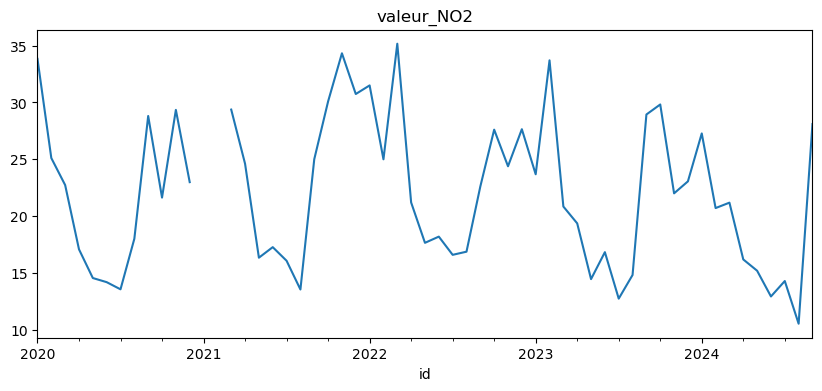

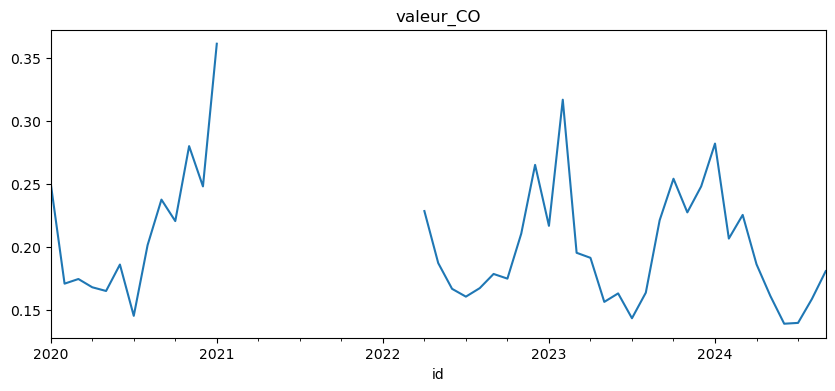

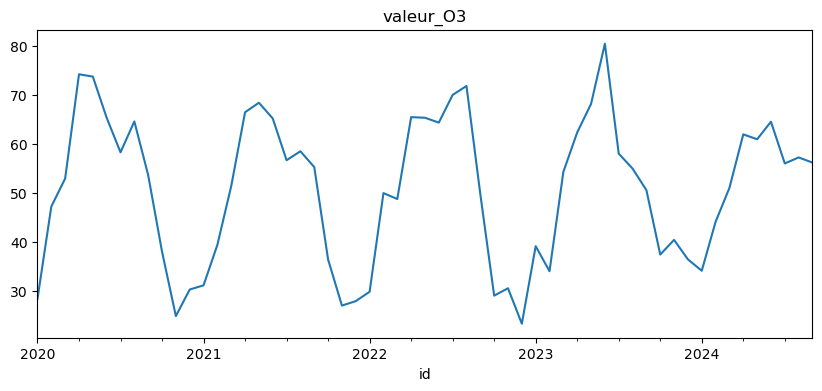

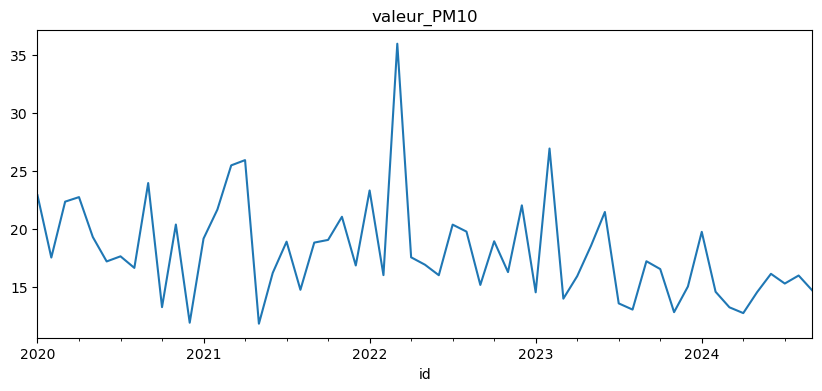

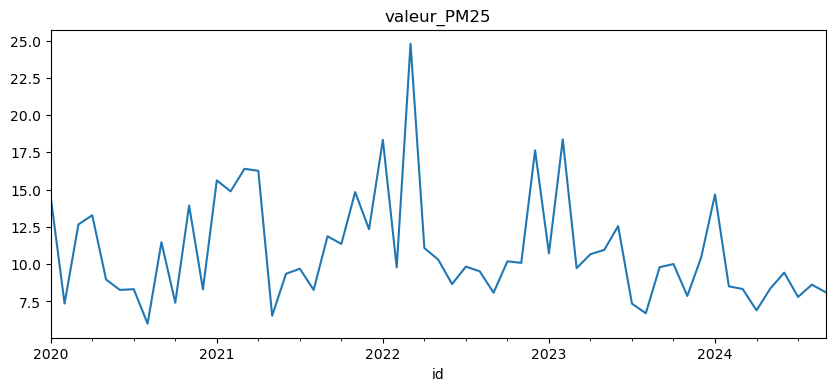

In [6]:
weekly_avg = df.resample('ME', on='id').mean()
for col in weekly_avg.columns:
    plt.figure(figsize=(10, 4))
    weekly_avg[col].plot(title=col)
    plt.show()

Clear winter = more pollution

Let's look at weekly and daily trends

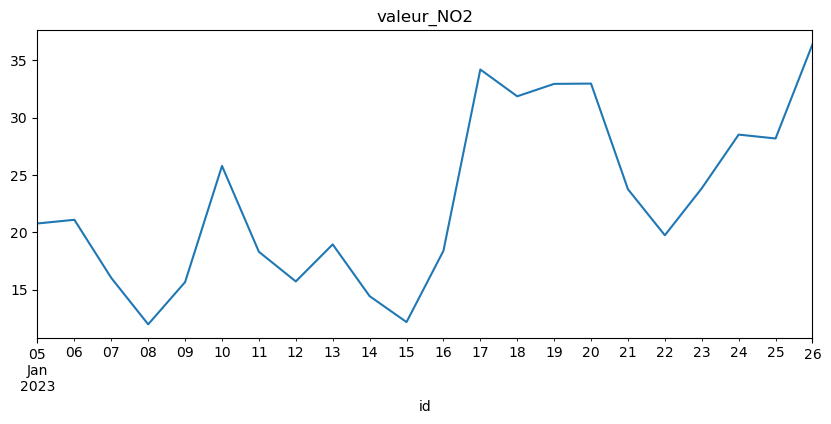

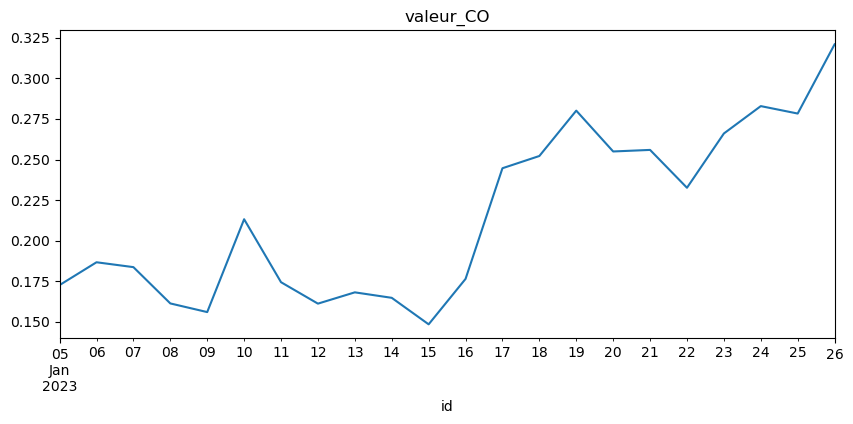

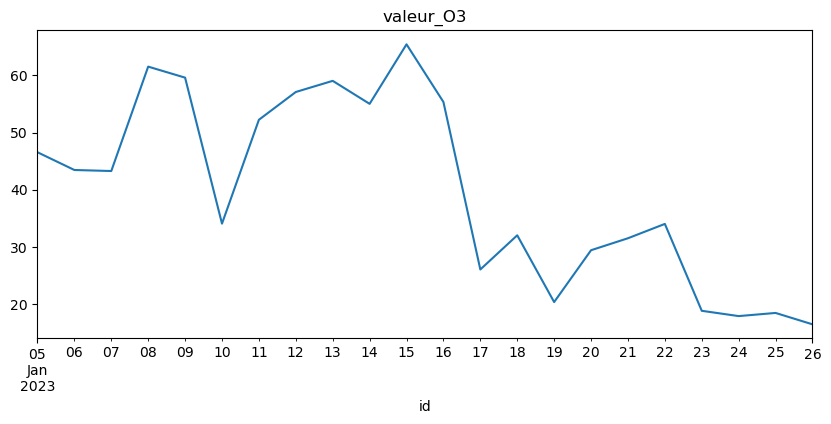

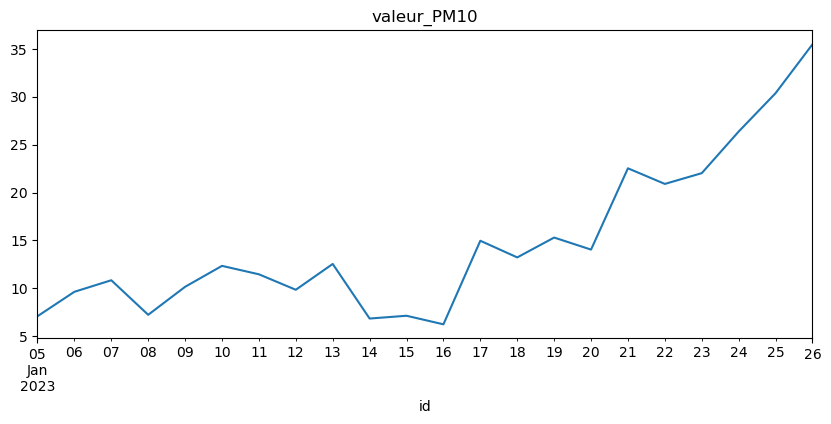

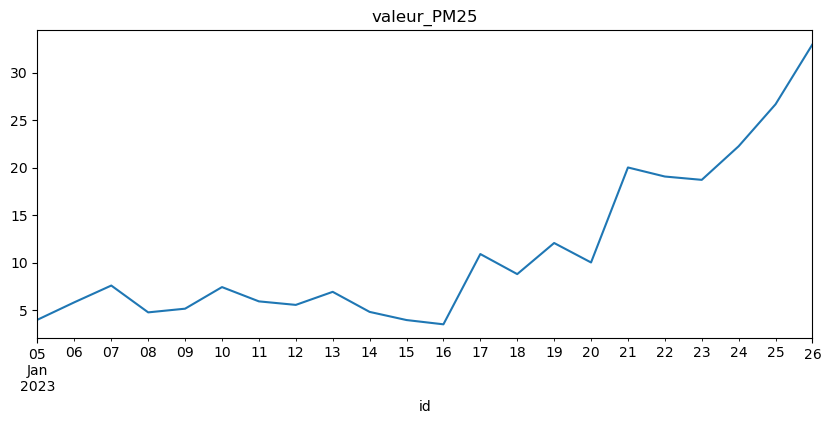

In [7]:
filter = (df['id'] >= '2023-01-05') & (df['id'] <= '2023-01-26')
daily_avg = df[filter].resample('D', on='id').mean()
for col in daily_avg.columns:
    plt.figure(figsize=(10, 4))
    daily_avg[col].plot(title=col)
    plt.show()

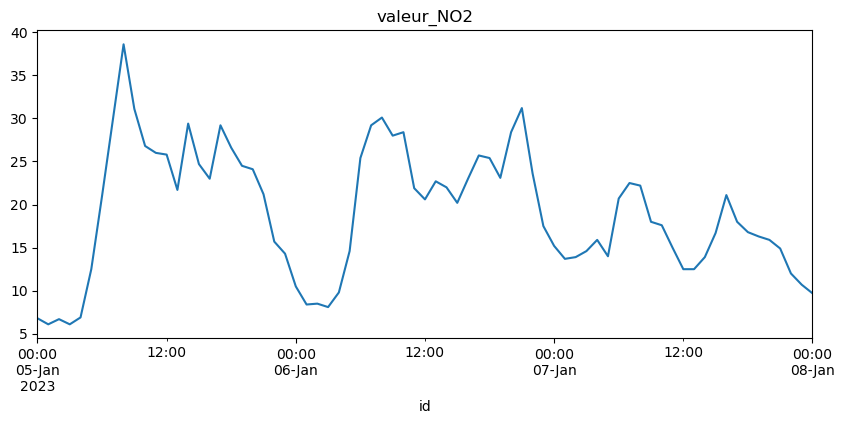

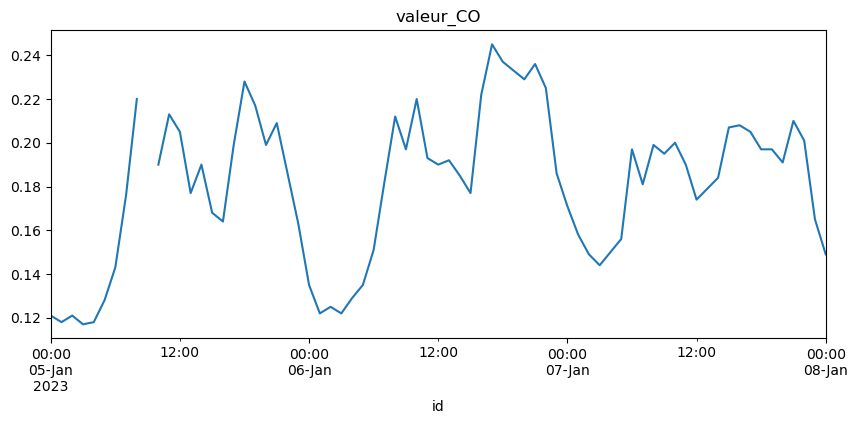

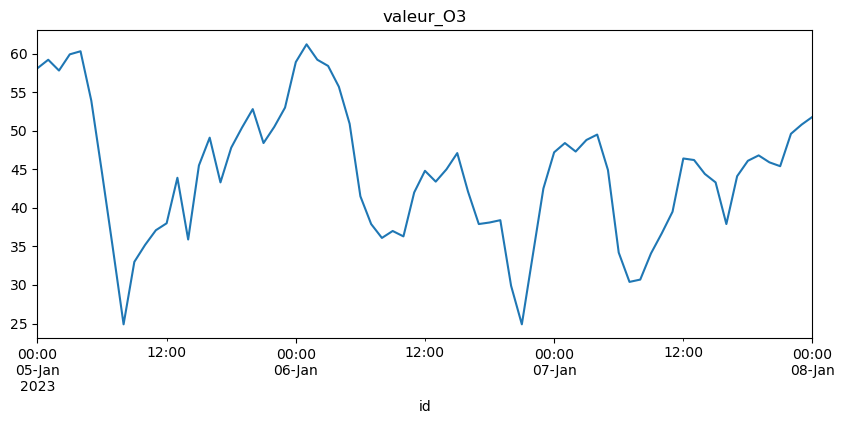

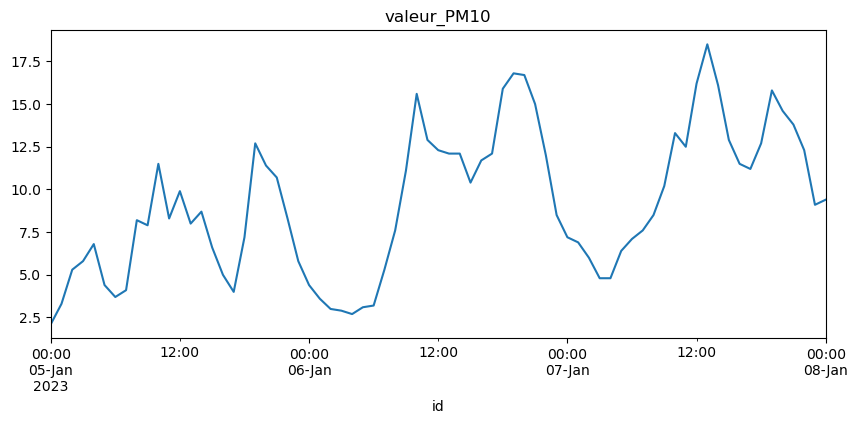

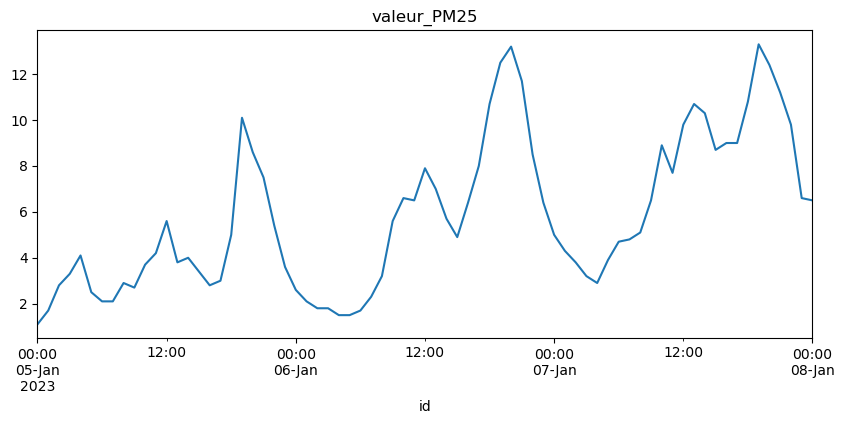

In [8]:
filter = (df['id'] >= '2023-01-05') & (df['id'] <= '2023-01-08')
daily_avg = df[filter].resample('h', on='id').mean()
for col in daily_avg.columns:
    plt.figure(figsize=(10, 4))
    daily_avg[col].plot(title=col)
    plt.show()

Decrease at night and at the middle of the day, probably due to traffic

No clear weekly patterns

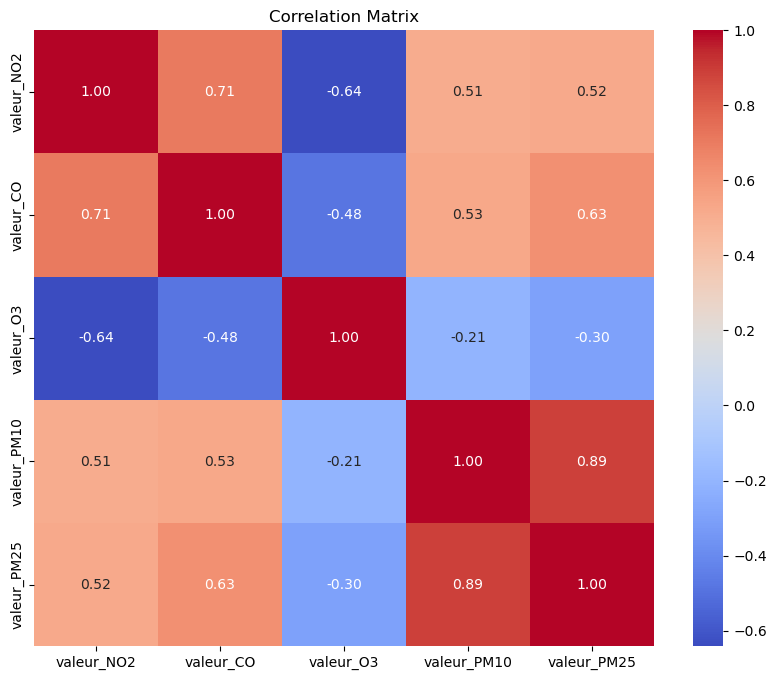

In [9]:
# Calculate the correlation matrix
corr_matrix = df[features].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [10]:
from sklearn.model_selection import TimeSeriesSplit